# Importing necessary libraries and data set

In [3]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [4]:
# reading the Encoded CSV file and displaying it using pandas.
df = pd.read_csv("encoded-sms-spam.csv")

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# Dimension of the data frame.
df.shape

(5572, 5)

# Data Cleaning

In [6]:
# printing the details of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Column 2,3,4 are not neccessary to we drop it
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
# printing the df with only 2 columns
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Renaming the column
df.rename(columns ={'v1':'result','v2':'input'},inplace=True)

# displaying the dataframe with renamed column.
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# result has two labels either 'ham' or 'spam' , we convert these labels into numerical values using 'LabelEncoder' from sklearn.

encoder = LabelEncoder()

df['result'] = encoder.fit_transform(df['result']) # updating the column.

df

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
# From the adove , it implies '0' for ham and '1' for spam.

In [11]:
# Doing null-check

df.isnull().sum() # gives the sum of null values column-wise

result    0
input     0
dtype: int64

In [12]:
# there is no null values in our data set.

In [13]:
# checking if there is DUPLICATE rows in the data set.

df.duplicated().sum()

403

In [14]:
# there are 403 duplicate rows , so we remove them

df = df.drop_duplicates(keep='first') # Remove duplicates and keep the first occurrence

# displaying the edited df
df

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
#rows reduced from 5572 to 5169 after DUPLICATED values have been deleted

# Exploratory Data Analysis

In [16]:
# The spam detection problem is a classification Problem.
# We have to classify the message as either 'spam' or 'ham'.

In [17]:
df['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [18]:
# '0' means ham and '1' means spam.
# So, 653 are spam from total.

In [19]:
653*100.0/5169

12.633004449603405

In [20]:
# It implies 12.63% of the data set is SPAM and rest is HAM

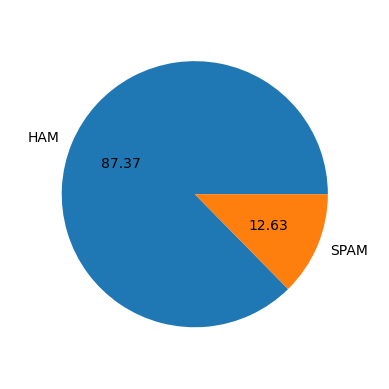

In [21]:
# creating visual representation of the data using matplotlib.

plt.pie(df['result'].value_counts(),labels=["HAM" , "SPAM"],autopct = '%0.2f',radius=0.9)
plt.show()

In [22]:
# From this we can see that the data is very imbalanced.

In [23]:
# Now the task is to analyze the ACTUAL TEXT in the message to classify it.
# For this purpose , we use 'Natural language Toolkit' Library.

In [24]:
# downloading the dependencies
# punkt package includes pre-trained models for tokenizing text in many Languages

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# creating a new column with count of characters.
df['countCharacters'] = df['input'].apply(len)
# Example : 
#   input	                    countCharacters
#   Hello, how are you?	        19
#   This is a sample sentence.	27


# creating a new column with count of words.
df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
# 'word_tokenize' function takes a string of text as input and returns a list of words.
'''After word_tokenize, the strings are split into words like this:

"Hello, how are you?" → ['Hello', ',', 'how', 'are', 'you', '?'] (6 tokens)
"This is a sample sentence." → ['This', 'is', 'a', 'sample', 'sentence', '.'] (6 tokens)
The word counts:

input	                    countWords
Hello, how are you?	        6
This is a sample sentence.	6
'''



# creating a new column with count of sentences
df['countSentences'] = df['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
# 'sent_tokenize' => sentence tokenize.
# 'sent_tokenize' function takes a string of text as input and returns a list of sentences.
'''
input
Hello, how are you? I am fine, thank you.
This is a sample sentence.
After sent_tokenize:

"Hello, how are you? I am fine, thank you." → ['Hello, how are you?', 'I am fine, thank you.'] (2 sentences)
"This is a sample sentence." → ['This is a sample sentence.'] (1 sentence)
The sentence counts:

input	                                    countSentences
Hello, how are you? I am fine, thank you.	2
This is a sample sentence.	                1
'''

C:\Users\hp\AppData\Local\Temp\ipykernel_21272\1344527089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countCharacters'] = df['input'].apply(len)
C:\Users\hp\AppData\Local\Temp\ipykernel_21272\1344527089.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
C:\Users\hp\AppData\Local\Temp\ipykernel_21272\1344527089.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

'\ninput\nHello, how are you? I am fine, thank you.\nThis is a sample sentence.\nAfter sent_tokenize:\n\n"Hello, how are you? I am fine, thank you." → [\'Hello, how are you?\', \'I am fine, thank you.\'] (2 sentences)\n"This is a sample sentence." → [\'This is a sample sentence.\'] (1 sentence)\nThe sentence counts:\n\ninput\t                                    countSentences\nHello, how are you? I am fine, thank you.\t2\nThis is a sample sentence.\t                1\n'

In [26]:
# Display the data frame with new columns
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# extraction the summary of the new columns.
df[['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# extracting the summary for 'SPAM' and 'HAM' individually.

In [29]:
df[df['result']==0][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['result']==1][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

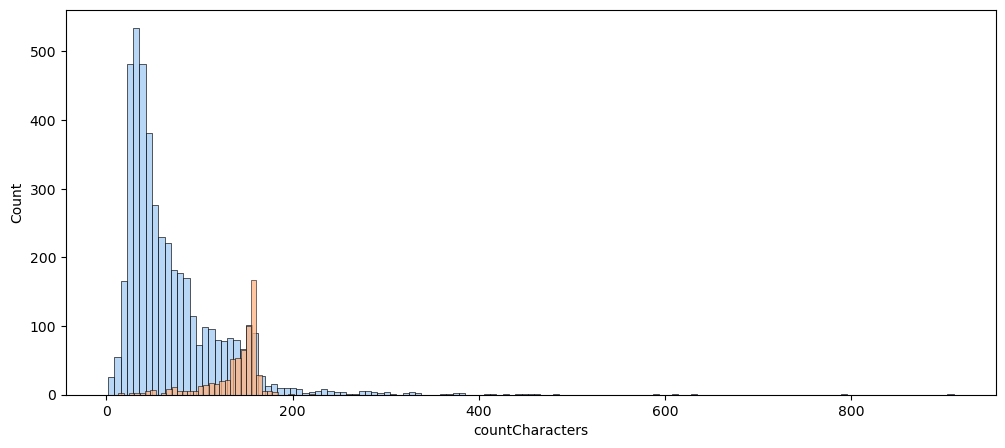

In [31]:
# for better visualization, we plot a histogram using 'seaborn'
plt.figure(figsize = (12, 5))
sns.histplot(df[df['result'] == 0]['countCharacters'], color=sns.color_palette("pastel")[0])
sns.histplot(df[df['result'] == 1]['countCharacters'], color=sns.color_palette("pastel")[1])



<Axes: xlabel='countWords', ylabel='Count'>

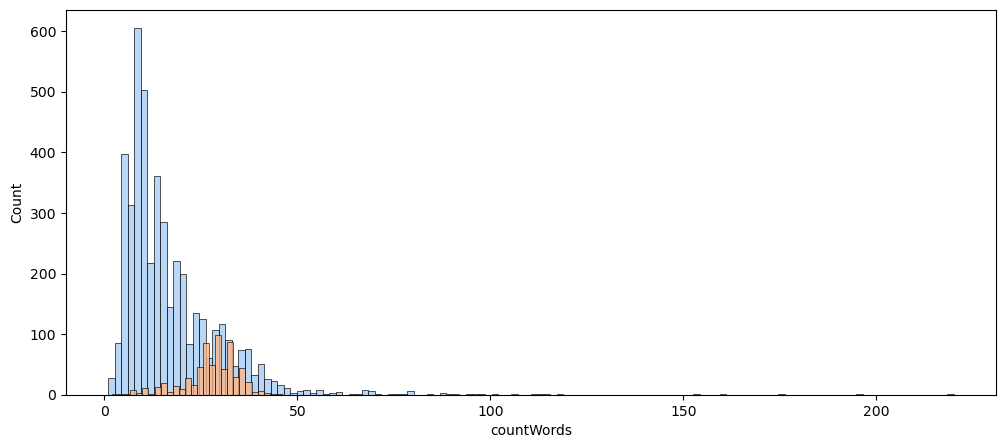

In [32]:
plt.figure(figsize = (12, 5))
sns.histplot(df[df['result'] == 0]['countWords'], color=sns.color_palette("pastel")[0])
sns.histplot(df[df['result'] == 1]['countWords'], color=sns.color_palette("pastel")[1])



In [33]:
# Observation :
#   1. mean of the characters in spam is more.

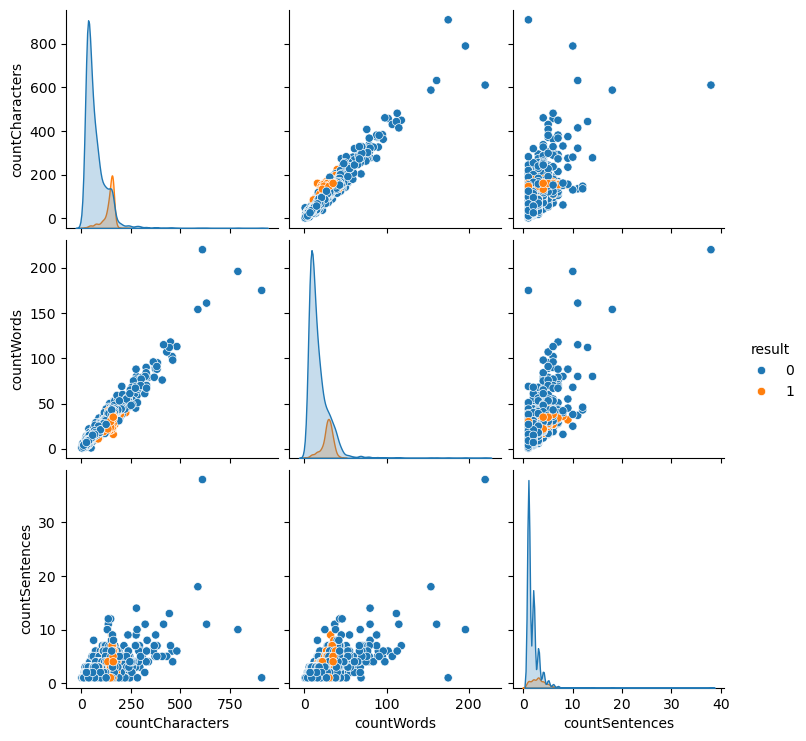

In [34]:
# finding relationship between the columns
sns.pairplot(df,hue='result')

***Insights for Spam Detection***
 - result == 1 (Spam):

    - Spam messages (orange points) tend to cluster around a lower range of countCharacters, countWords, and countSentences.
    - This suggests spam messages are often shorter, possibly focusing on concise promotional content or malicious links.

 - result == 0 (Non-Spam):

    - Non-spam messages (blue points) show a wider spread across all metrics.
    - These messages tend to be longer (higher countCharacters and countWords) and contain more sentences compared to spam messages.

***Observations for Feature Importance***
   - Features like countCharacters and countWords appear promising for distinguishing between spam and non-spam messages:

      - Spam messages are often short and have fewer characters/words.
      - Non-spam messages generally have higher counts for these metrics.

   - countSentences might provide additional insights:

      - Spam messages are often short and have very few sentences, while non-spam messages have more variability in sentence counts.

# Data Preprocessing

In [35]:
# Doing data preprocessing to ensures the data is clean, consistent, and suitable 
# for building a robust spam detection model.

In [ ]:
# downloading the package which contains the stopwords
nltk.download('stopwords')

#Stopwords are common words in a language that usually carry little to no significant 
# meaning for text analysis or natural language processing (NLP). These words are often
# removed during preprocessing because they occur frequently and do not help in 
# distinguishing between classes (e.g., spam vs. non-spam).

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
def transform_text(text):
    """
    Function to preprocess and transform text data for spam detection.
    The function performs the following steps:
    1. Converts text to lowercase.
    2. Tokenizes the text into individual words.
    3. Removes special characters (non-alphanumeric characters).
    4. Removes stopwords and punctuation.
    5. Applies stemming to reduce words to their root form.
    The processed text is returned as a single string after transformation.
    """

    # Step 1: Converting the text to lowercase.
    # This ensures that the spam detection model is case-insensitive,
    # and variations in capitalization do not affect the detection process.
    text = text.lower()

    # Step 2: Tokenizing the text.
    # Tokenization splits the text into individual words (tokens).
    # This is essential for processing the text in a way that the model can understand,
    # as spam detection models typically work with individual words or phrases.
    text = nltk.word_tokenize(text)  # text is now a list of words

    # Step 3: Removing special characters.
    # Special characters such as @, #, $, etc., do not contribute to spam detection
    # and can be removed to make the model focus only on meaningful words.
    removed_special_char = list()
    for i in text:
        if i.isalnum():  # Keeping only alphanumeric words (letters and digits)
            removed_special_char.append(i)

    # Updating the text after removing special characters.
    # This step ensures the text only contains words that can be processed further.
    text = removed_special_char[:]

    # Step 4: Removing stopwords and punctuation characters.
    # Stopwords like 'the', 'a', 'is' do not contribute to spam detection
    # because they are very common words that don't carry significant meaning in context.
    # Removing punctuation characters also helps in focusing on the core words.
    removed_stop_word_punc = list()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            removed_stop_word_punc.append(i)

    # Updating the text after removing stopwords and punctuation.
    text = removed_stop_word_punc[:]

    # Step 5: Stemming the words.
    # Stemming reduces words to their root form (e.g., "running" becomes "run").
    # This is important for spam detection, as the model may not differentiate between
    # "run", "running", and "runner", but they should be treated as the same word.
    ps = PorterStemmer()  # Initializing the stemmer
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))  # Applying the stemmer to each word

    # Final update to text after stemming.
    text = stemmed[:]

    # Returning the transformed text as a single string.
    # The model can now use this preprocessed text to better detect spam.
    return " ".join(text)


In [49]:
'''
Stemming is a process in Natural Language Processing (NLP) that reduces words to their base or root form.
The goal is to remove suffixes or prefixes to bring words like "running", "runner", and "ran" to their root 
form, such as "run". This simplifies text data and helps models focus on core meanings rather than variations of the same word.


PorterStemmer Instance:
    - The PorterStemmer is a popular stemming algorithm provided by the nltk library.
    - It applies a set of heuristic rules to remove common suffixes like "ing", "ly", "ed", etc.,
      from words.

'''

'\nStemming is a process in Natural Language Processing (NLP) that reduces words to their base or root form.\nThe goal is to remove suffixes or prefixes to bring words like "running", "runner", and "ran" to their root \nform, such as "run". This simplifies text data and helps models focus on core meanings rather than variations of the same word.\n\n\nPorterStemmer Instance:\n    - The PorterStemmer is a popular stemming algorithm provided by the nltk library.\n    - It applies a set of heuristic rules to remove common suffixes like "ing", "ly", "ed", etc.,\n      from words.\n\n'

In [50]:
# creating a new column to store the transformed the text -> 'processed'
df['processed'] = df['input'].apply(transform_text)

df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_21272\492105954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
'''
A word cloud is a visualization technique used to display the most frequently occurring words in a dataset.
Words with higher frequencies appear larger and bolder, while less frequent words are smaller.

Use Case for Spam Detection:
    In spam detection, a word cloud helps:

        - Identify common spam-related words (e.g., "free", "win", "offer").
        - Gain insights into how spam messages differ from non-spam.
'''

'\nA word cloud is a visualization technique used to display the most frequently occurring words in a dataset.\nWords with higher frequencies appear larger and bolder, while less frequent words are smaller.\n\nUse Case for Spam Detection:\n    In spam detection, a word cloud helps:\n\n        - Identify common spam-related words (e.g., "free", "win", "offer").\n        - Gain insights into how spam messages differ from non-spam.\n'

In [41]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

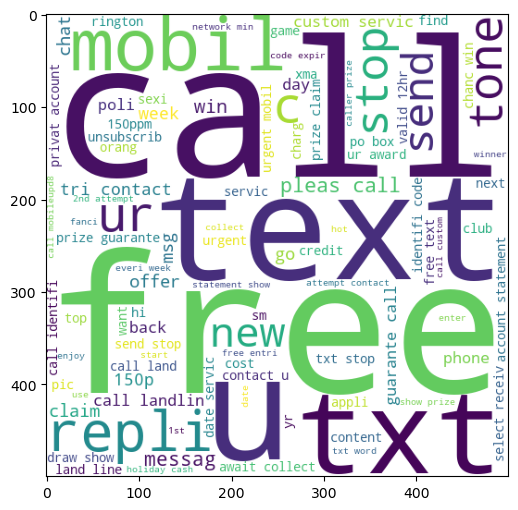

In [42]:
# for SPAM
spam_word_cloud = wc.generate(df[df['result']==1]['processed'].str.cat(sep=" "))

# .str.cat(sep=" "): Combines all processed spam messages into a single string.

# displaying it
plt.figure(figsize=(12,6))
plt.imshow(spam_word_cloud)

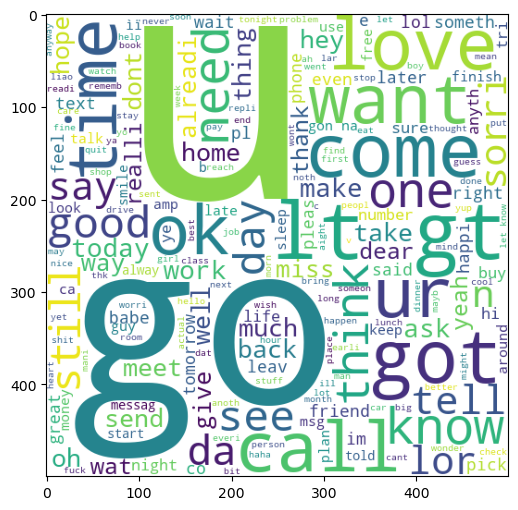

In [43]:
# for HAM
ham_word_cloud = wc.generate(df[df['result']==0]['processed'].str.cat(sep=" "))

# .str.cat(sep=" "): Combines all processed spam messages into a single string.

# displaying it
plt.figure(figsize=(12,6))
plt.imshow(ham_word_cloud)

In [44]:
# extracting all the words used in SPAM messages
spam_words = list()

for msg in df[df['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spam_words.append(word)
    
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [45]:
# counting the frequency of the words using Counter class
spam_words_dictionary = Counter(spam_words)

# extracting the most commom words
spam_words_dictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [46]:
# converting the dictionary to a dataframe
most_common_spam_words = pd.DataFrame(spam_words_dictionary.most_common(40))

C:\Users\hp\AppData\Local\Temp\ipykernel_21272\1526534576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_common_spam_words, x=0, y=1, palette="viridis")


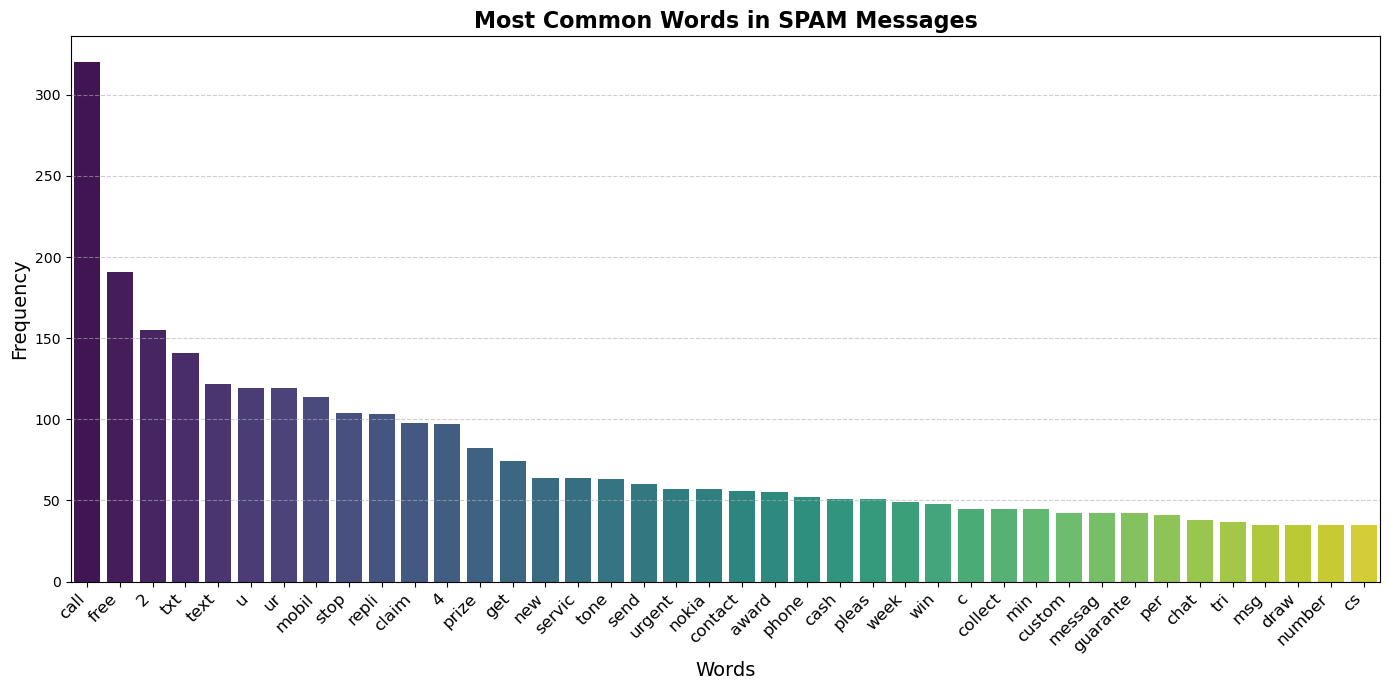

In [47]:
plt.figure(figsize=(14, 7)) 
sns.barplot(data=most_common_spam_words, x=0, y=1, palette="viridis")  

plt.title("Most Common Words in SPAM Messages", fontsize=16, fontweight='bold')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.xticks(rotation=45, fontsize=12, ha='right') 


plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()  
plt.show()
